In [339]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cushioning-data-csv/Data.csv
/kaggle/input/cushioning-data/Data.xlsx


In [323]:
df = pd.read_csv("/kaggle/input/cushioning-data-csv/Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tons                83 non-null     float64
 1   Bush Length         83 non-null     float64
 2   Type                83 non-null     object 
 3   Bush OD             70 non-null     float64
 4   Clearance           83 non-null     float64
 5   Notches             80 non-null     float64
 6   Notch Angle degree  80 non-null     float64
 7   Notch length(mm)    83 non-null     float64
 8   Working _fine       83 non-null     object 
dtypes: float64(7), object(2)
memory usage: 6.0+ KB


In [324]:
df['Working _fine'] =df['Working _fine'].apply(lambda x: 1 if x == 'Y' else 0) 
df['Working _fine'].value_counts()

Working _fine
0    45
1    38
Name: count, dtype: int64

In [325]:
cols = ['Notches' , 'Notch Angle degree']
df[cols] = df[cols].bfill()

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tons                83 non-null     float64
 1   Bush Length         83 non-null     float64
 2   Type                83 non-null     object 
 3   Bush OD             70 non-null     float64
 4   Clearance           83 non-null     float64
 5   Notches             83 non-null     float64
 6   Notch Angle degree  83 non-null     float64
 7   Notch length(mm)    83 non-null     float64
 8   Working _fine       83 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.0+ KB


In [326]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tons                83 non-null     float64
 1   Bush Length         83 non-null     float64
 2   Type                83 non-null     int64  
 3   Bush OD             70 non-null     float64
 4   Clearance           83 non-null     float64
 5   Notches             83 non-null     float64
 6   Notch Angle degree  83 non-null     float64
 7   Notch length(mm)    83 non-null     float64
 8   Working _fine       83 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 6.0 KB


In [328]:
df_temp = df.copy()
X = df_temp.drop('Bush OD' , axis = 1)
y = df_temp.pop('Bush OD')
null_ind = list(y[(y >= 0)].index)
X = X.iloc[null_ind]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 82
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tons                70 non-null     float64
 1   Bush Length         70 non-null     float64
 2   Type                70 non-null     int64  
 3   Clearance           70 non-null     float64
 4   Notches             70 non-null     float64
 5   Notch Angle degree  70 non-null     float64
 6   Notch length(mm)    70 non-null     float64
 7   Working _fine       70 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 4.9 KB


In [329]:
y = y.iloc[null_ind]
y.info()

<class 'pandas.core.series.Series'>
Index: 70 entries, 0 to 82
Series name: Bush OD
Non-Null Count  Dtype  
--------------  -----  
70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [330]:
X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# Create an instance of the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.7156545714285705
R^2 Score: 0.8811293650725445


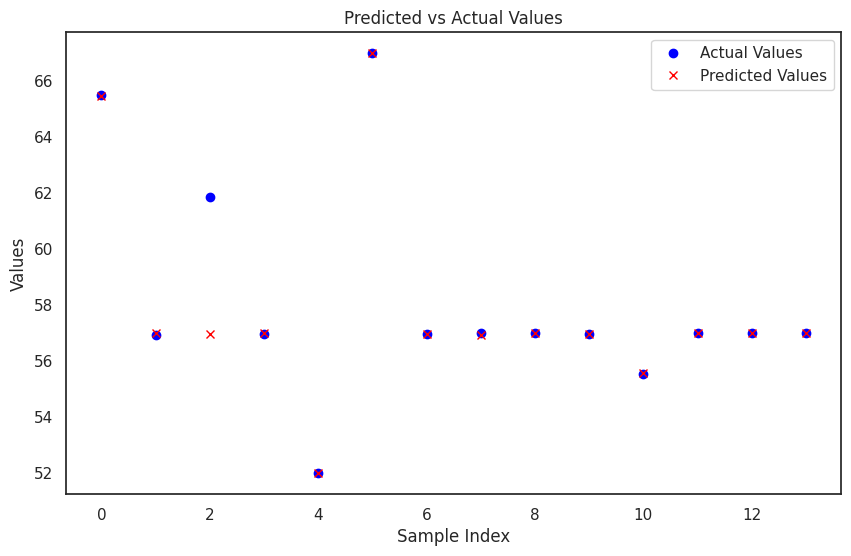

In [332]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, 'o', color='blue', label='Actual Values')
plt.plot(y_pred, 'x', color='red', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [335]:
y_copy = df['Bush OD']
null_ind = list(y_copy[~(y_copy >= 0)].index)
df_copy = df.copy()
X_temp = df_copy.iloc[null_ind].drop('Bush OD' , axis = 1)
y_temp = df_copy.iloc[null_ind]['Bush OD']
y_temp = regressor.predict(X_temp)
df_copy.loc[null_ind , 'Bush OD'] = y_temp
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tons                83 non-null     float64
 1   Bush Length         83 non-null     float64
 2   Type                83 non-null     int64  
 3   Bush OD             83 non-null     float64
 4   Clearance           83 non-null     float64
 5   Notches             83 non-null     float64
 6   Notch Angle degree  83 non-null     float64
 7   Notch length(mm)    83 non-null     float64
 8   Working _fine       83 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 6.0 KB


In [336]:
df = df_copy.copy()
df_temp = df.copy()
X = df_temp.drop('Working _fine' , axis = 1)
y = df_temp.pop('Working _fine')

In [337]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, max_depth = 2 , learning_rate = 0.20 , objective = 'binary:logistic')

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.80      0.67      0.73         6

    accuracy                           0.82        17
   macro avg       0.82      0.79      0.80        17
weighted avg       0.82      0.82      0.82        17



(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Tons'),
  Text(1, 0, 'Bush Length'),
  Text(2, 0, 'Type'),
  Text(3, 0, 'Bush OD'),
  Text(4, 0, 'Clearance'),
  Text(5, 0, 'Notches'),
  Text(6, 0, 'Notch Angle degree'),
  Text(7, 0, 'Notch length(mm)')])

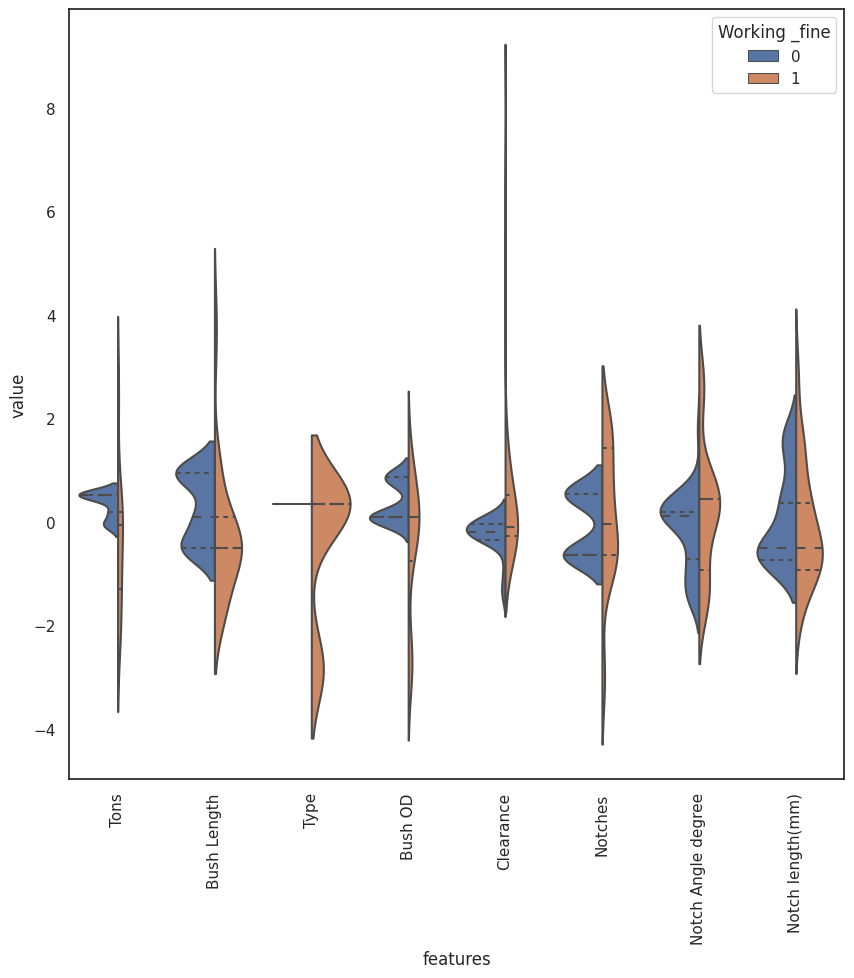

In [338]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
data = X
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="Working _fine",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Working _fine", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [46]:
X.columns

Index(['Tons', 'Bush Length', 'Type', 'Bush OD', 'Clearance', 'Notches',
       'Notch Angle degree', 'Notch length(mm)'],
      dtype='object')

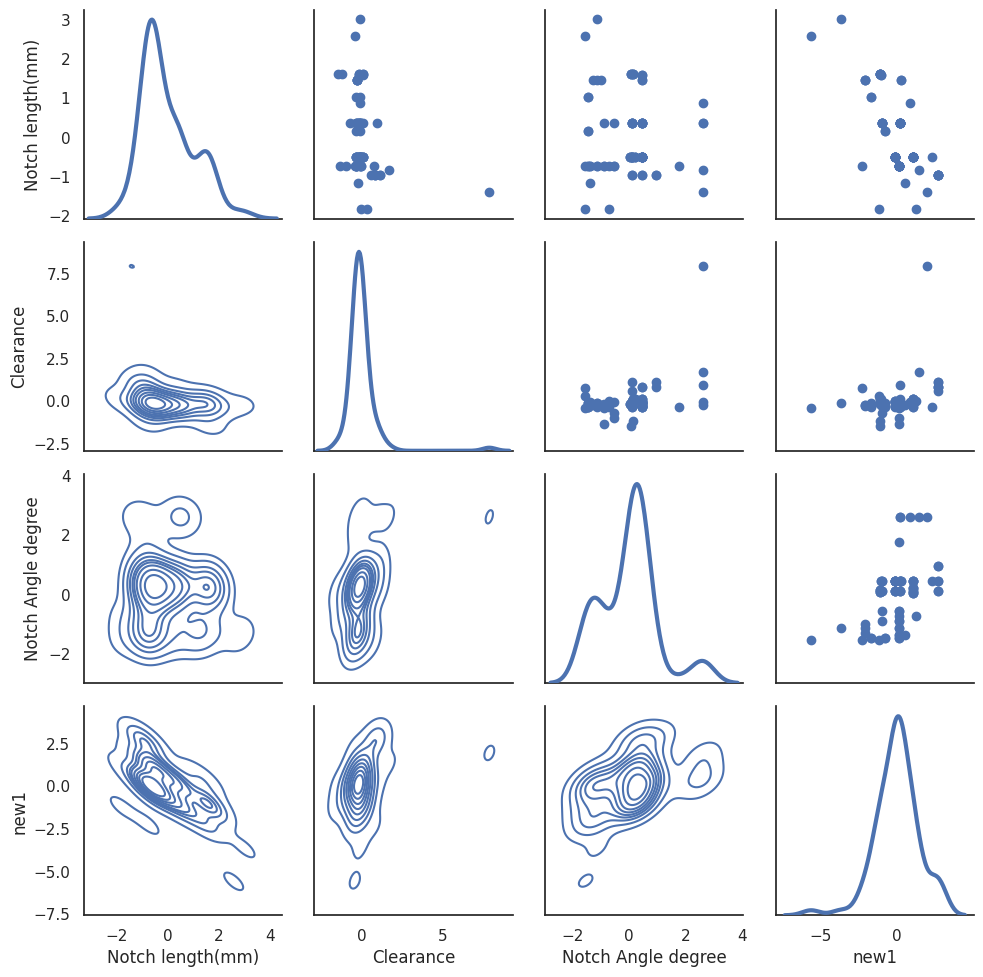

In [361]:
X_copy = X.copy()
sns.set(style="white")
df = X_copy.loc[:,['Notch length(mm)','Clearance', 'Notch Angle degree' , 'new1']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [406]:
X_copy = X.copy()
# X_copy['new'] = np.log(abs(X_copy['Notch Angle degree']))
# X_copy['new'] = np.log(abs(X_copy['Notches']))
# X_copy['new'] = np.log(np.sqrt(abs(X_copy['Notch Angle degree']-X_copy['Notches']))+1)
# X_copy['new'] = np.log(abs((X_copy['Clearance'])*(X_copy['Notch Angle degree'])+1))  donot add this
X_copy = (X_copy - X_copy.mean())/X_copy.std()
# X_copy['new'] = np.log(abs(X_copy['Bush Length'])**2)
# X_copy['new'] = np.log((abs((X_copy['Notches']+X_copy['Notch Angle degree'])/X_copy['Notch Angle degree']))+1)
X_copy['new'] = np.log(abs(X_copy['Notches']-X_copy['Notch length(mm)']))

cols_to_drop = ['Notches', 'Type'] 
# X_copy['new1'] = (X_copy['Notches']-X_copy['Notch length(mm)']) 
X_copy = X_copy.drop(cols_to_drop , axis= 1)

In [1]:
y_copy = y.copy()
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=0)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, max_depth = 2 , learning_rate = 0.20 , objective = 'binary:logistic')

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


NameError: name 'y' is not defined

Feature ranking:
1. feature 2 (0.205873)
2. feature 6 (0.195880)
3. feature 0 (0.191851)
4. feature 3 (0.146446)
5. feature 1 (0.092877)
6. feature 5 (0.089601)
7. feature 4 (0.077473)


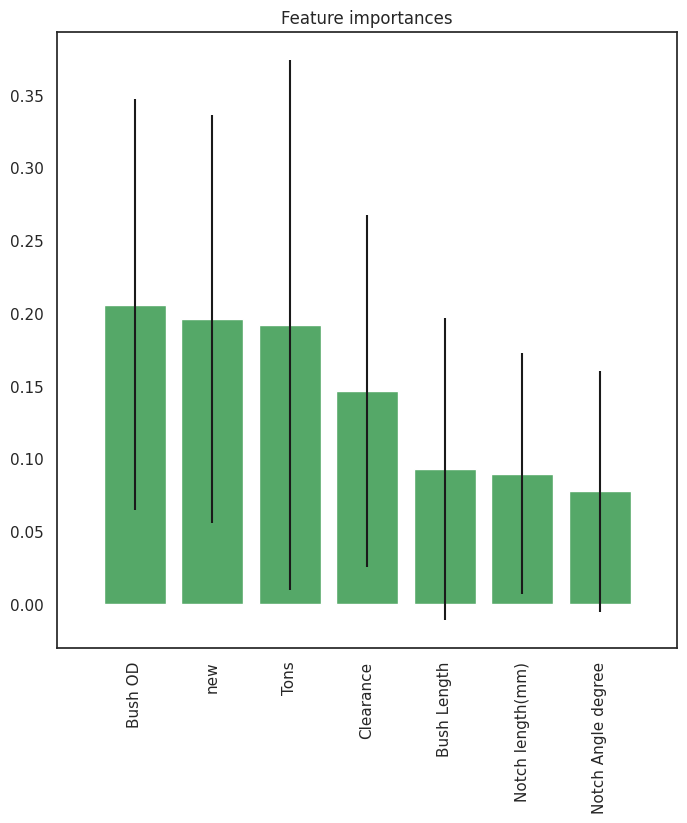

In [408]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [321]:
y_pred = xgb_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9848484848484849
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.97      0.98        32

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



In [343]:
import time

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Tons'),
  Text(1, 0, 'Bush Length'),
  Text(2, 0, 'Type'),
  Text(3, 0, 'Bush OD'),
  Text(4, 0, 'Clearance'),
  Text(5, 0, 'Notches'),
  Text(6, 0, 'Notch Angle degree'),
  Text(7, 0, 'Notch length(mm)')])

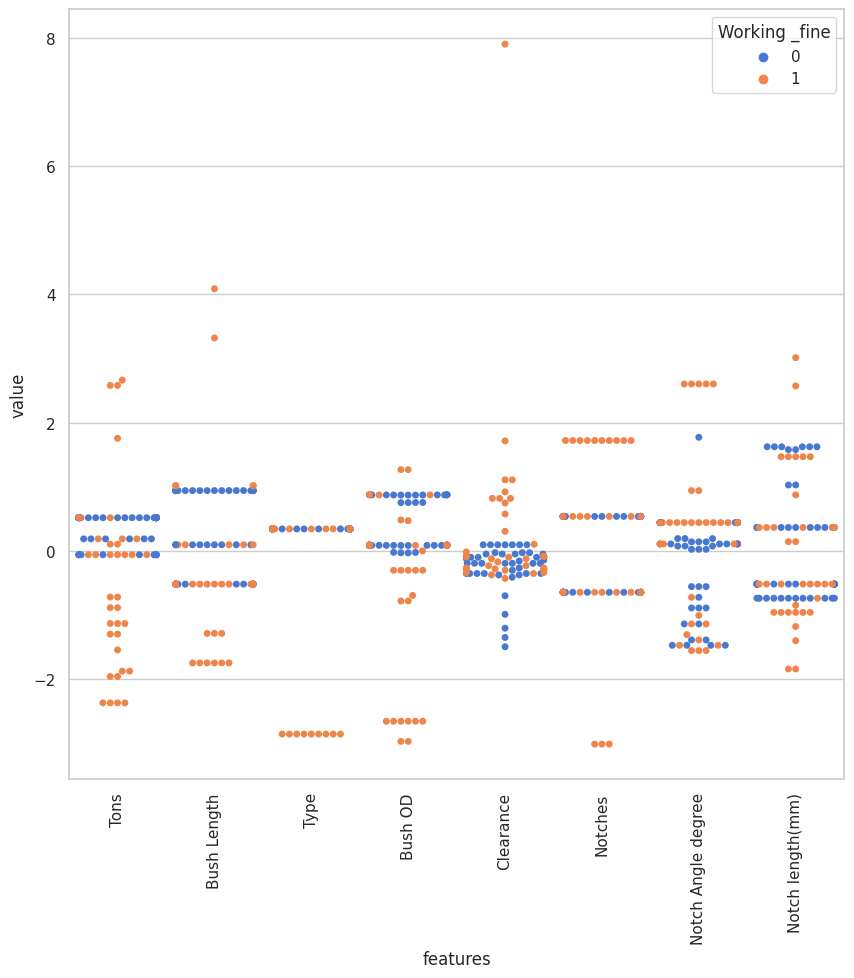

In [344]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std()) 
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Working _fine",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Working _fine", data=data)

plt.xticks(rotation=90)

<Axes: >

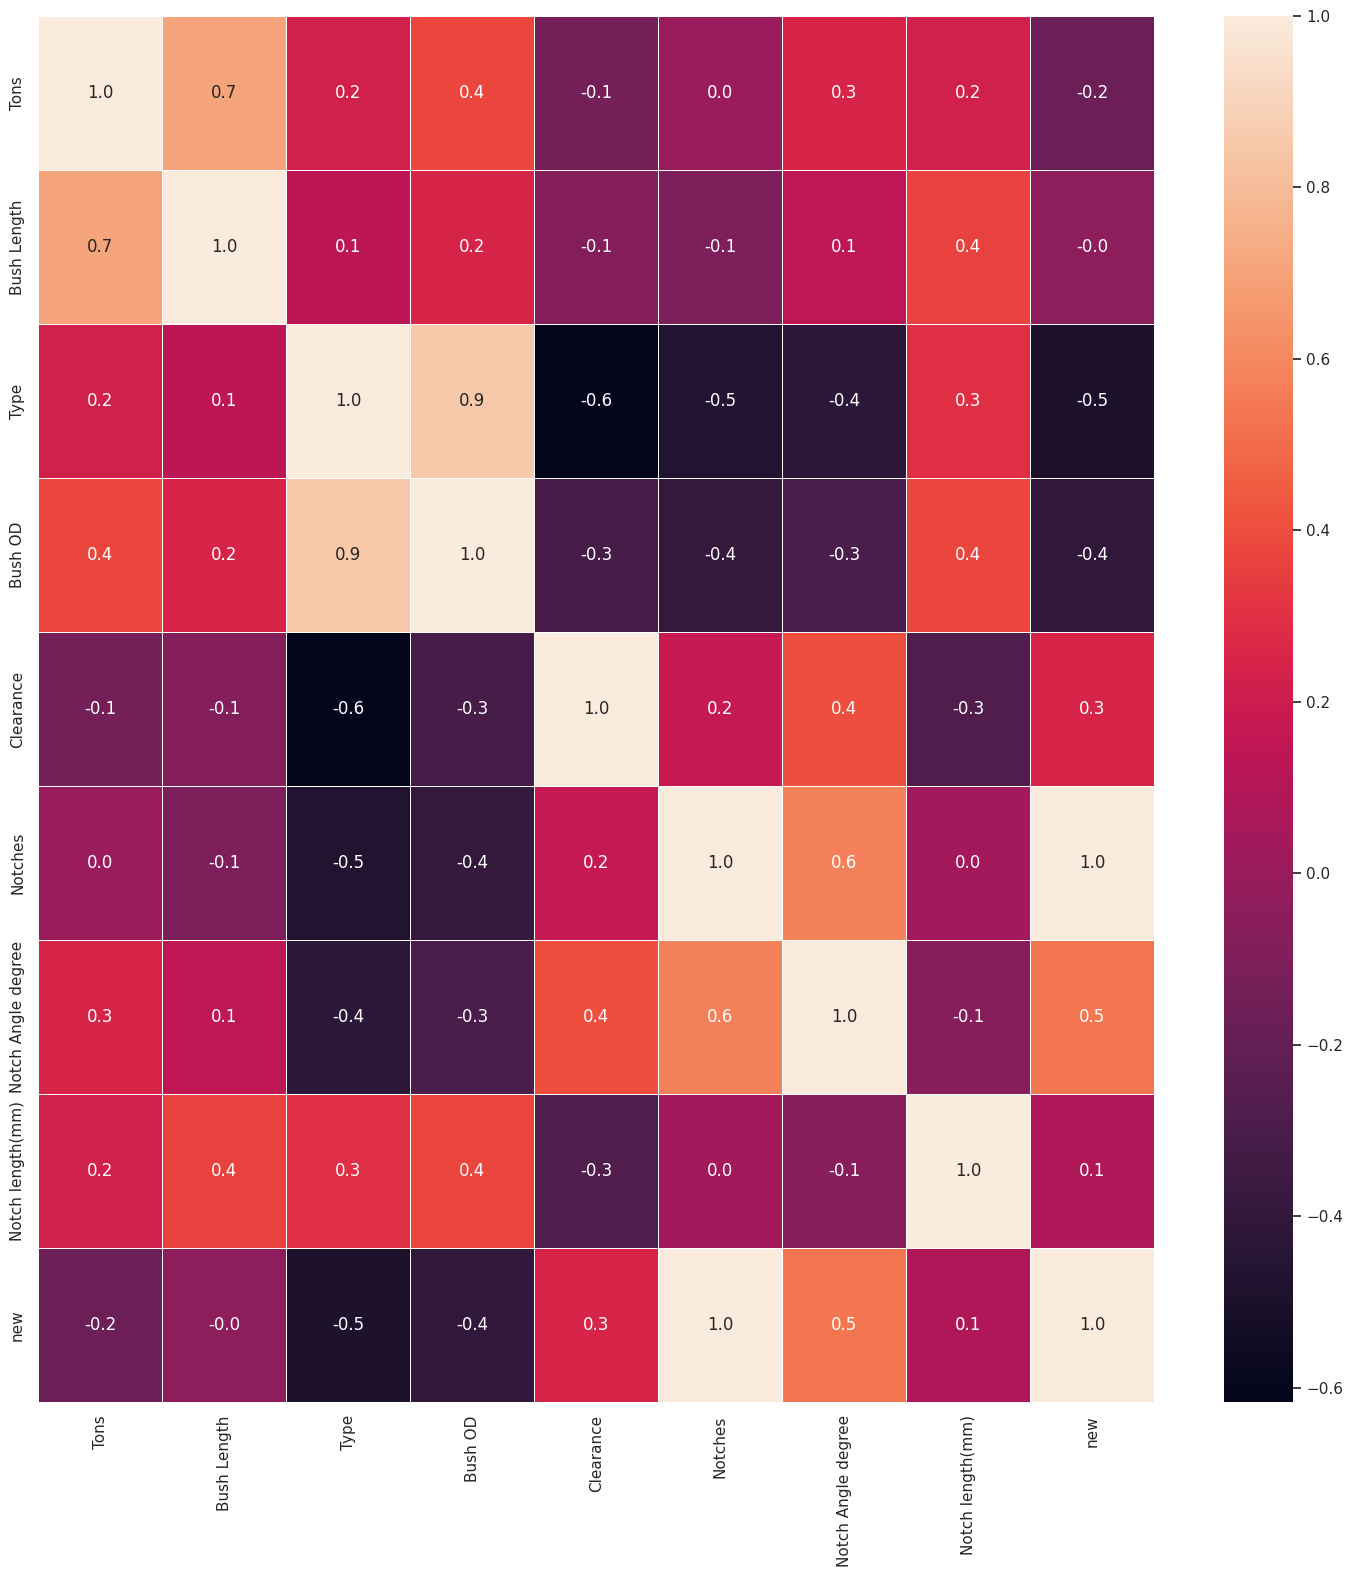

In [73]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [74]:
# X_copy = X.copy()
y_copy = y.copy()

X_copy = X_copy.drop('Type' , axis = 1)

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, max_depth = 2 , learning_rate = 0.20 , objective = 'binary:logistic')

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


XGBoostError: [03:40:37] /workspace/src/data/../common/../data/gradient_index.h:94: Check failed: valid: Input data contains `inf` or a value too large, while `missing` is not set to `inf`
Stack trace:
  [bt] (0) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x3effba) [0x7bac52202fba]
  [bt] (1) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x40645c) [0x7bac5221945c]
  [bt] (2) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4071c5) [0x7bac5221a1c5]
  [bt] (3) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x3f6316) [0x7bac52209316]
  [bt] (4) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7bac5220b858]
  [bt] (5) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7bac521b5a07]
  [bt] (6) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7bac51f78c40]
  [bt] (7) /opt/conda/lib/python3.10/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7bacbfe60a4a]
  [bt] (8) /opt/conda/lib/python3.10/lib-dynload/../../libffi.so.8(+0x5fea) [0x7bacbfe5ffea]



In [353]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 1
Best features : Index(['Bush OD'], dtype='object')


In [358]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

Feature ranking:
1. feature 2 (0.230138)
2. feature 0 (0.228224)
3. feature 3 (0.188197)
4. feature 5 (0.121966)
5. feature 6 (0.095480)
6. feature 1 (0.079720)
7. feature 4 (0.056275)


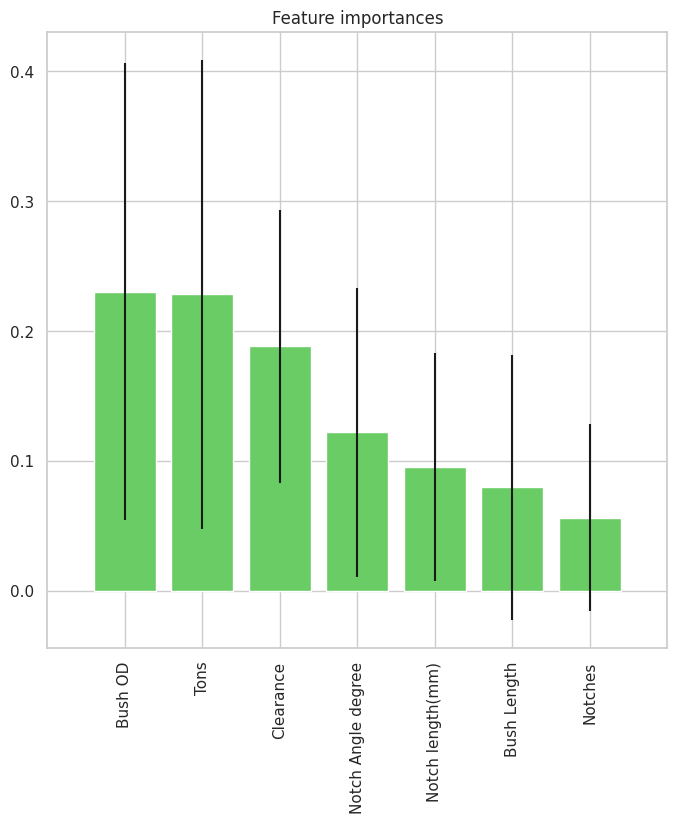

In [363]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [371]:
X_copy = X.copy()
y_copy = y.copy()

cols_to_drop = ['Notch length(mm)' , 'Notches' , 'Bush Length']

X_copy['new'] = X_copy['Notches']-X_copy['Notch length(mm)'] 
X_copy = X_copy.drop(cols_to_drop, axis = 1)

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, max_depth = 2 , learning_rate = 0.20 , objective = 'binary:logistic')

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80         6

    accuracy                           0.88        17
   macro avg       0.92      0.83      0.86        17
weighted avg       0.90      0.88      0.88        17

